In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Embedding, SimpleRNN, GRU, Dense, LSTM, Bidirectional

2024-08-01 20:59:22.148879: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-01 20:59:22.151382: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-01 20:59:22.158922: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 20:59:22.170384: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 20:59:22.173641: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-01 20:59:22.183146: I tensorflow/core/platform/cpu_feature_gu

# Data preparation

In [2]:
max_features = 10000
maxlen = 500 # max number of words in text
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# Models
### Model create and learn function

In [3]:
def create_learn_model(layers):
    model = Sequential()

    model.add(Embedding(max_features, 32))

    # Inside layers
    for layer in layers[1:]:
        model.add(layer)

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    model.summary()

    # Early stopping callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # Model checkpoint callback
    model_checkpoint = ModelCheckpoint(
        filepath=f'{layers[0]}.keras',
        monitor='val_loss',
        save_best_only=True
    )

    history = model.fit(
            input_train, y_train,
            epochs=20,
            batch_size=128,
            validation_split=0.3,
            callbacks=[early_stopping, model_checkpoint]
        )

    return history, model

### Model inside layers definition

In [4]:
RNU_model_layers = ["model_RNU",SimpleRNN(32)]
GRU_model_layers = ["model_GRU",GRU(32)]
LSTM_model_layers = ["model_LSTM",LSTM(32)]
BRNN_model_layers = ["model_BRNN",Bidirectional(LSTM(32))]
DRNN_model_layers = ["model_DRNN",Bidirectional(LSTM(32, return_sequences=True)), Bidirectional(LSTM(32))]

### Create models

In [5]:
RNU_history, RNU_model = create_learn_model(RNU_model_layers)
GRU_history, GRU_model = create_learn_model(GRU_model_layers)
LSTM_history, LSTM_model = create_learn_model(LSTM_model_layers)
BRNN_history, BRNN_model = create_learn_model(BRNN_model_layers)
DRNN_history, DRNN_model = create_learn_model(DRNN_model_layers)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - acc: 0.5913 - loss: 0.6581 - val_acc: 0.7577 - val_loss: 0.5173
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - acc: 0.8159 - loss: 0.4257 - val_acc: 0.8407 - val_loss: 0.3792
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - acc: 0.8642 - loss: 0.3333 - val_acc: 0.8292 - val_loss: 0.3870
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - acc: 0.8905 - loss: 0.2717 - val_acc: 0.8528 - val_loss: 0.3540
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - acc: 0.9170 - loss: 0.2202 - val_acc: 0.8700 - val_loss: 0.3333
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - acc: 0.9158 - loss: 0.2286 - val_acc: 0.8685 - val_loss: 0.3458
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - acc: 0.9398 - loss: 0.1643 - val_acc: 0.8320 - val_loss: 0.4095
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - acc: 0.9563 - loss: 0.1252 - val_acc: 0.8476 - val_loss: 0.4156


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - acc: 0.5517 - loss: 0.6850 - val_acc: 0.7585 - val_loss: 0.5056
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - acc: 0.7775 - loss: 0.4732 - val_acc: 0.8344 - val_loss: 0.3759
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - acc: 0.8396 - loss: 0.3756 - val_acc: 0.8227 - val_loss: 0.4037
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step - acc: 0.8710 - loss: 0.3123 - val_acc: 0.8575 - val_loss: 0.3374
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - acc: 0.8907 - loss: 0.2757 - val_acc: 0.8252 - val_loss: 0.4210
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step - acc: 0.8902 - loss: 0.2748 - val_acc: 0.8567 - val_loss: 0.3354
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step - acc: 0.9073 - loss: 0.2390 - val_acc: 0.8472 - val_loss: 0.3578
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - acc: 0.9098 - loss: 0.2404 - val_acc: 0.8569 - val_loss: 0.3592
Epoch 9/20
137/137 ━━━━━━━━━━━━━

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - acc: 0.5570 - loss: 0.6773 - val_acc: 0.8033 - val_loss: 0.4602
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - acc: 0.7977 - loss: 0.4520 - val_acc: 0.8573 - val_loss: 0.3449
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - acc: 0.8491 - loss: 0.3575 - val_acc: 0.8544 - val_loss: 0.3537
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - acc: 0.8760 - loss: 0.3100 - val_acc: 0.8385 - val_loss: 0.3741
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - acc: 0.8829 - loss: 0.2928 - val_acc: 0.8627 - val_loss: 0.3227
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - acc: 0.9066 - loss: 0.2458 - val_acc: 0.8815 - val_loss: 0.2963
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - acc: 0.9169 - loss: 0.2246 - val_acc: 0.8759 - val_loss: 0.3108
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - acc: 0.9173 - loss: 0.2256 - val_acc: 0.8733 - val_loss: 0.3049
Epoch 9/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - acc: 0.5292 - loss: 0.6879 - val_acc: 0.7489 - val_loss: 0.5279
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - acc: 0.7751 - loss: 0.4917 - val_acc: 0.8260 - val_loss: 0.3941
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - acc: 0.8429 - loss: 0.3696 - val_acc: 0.8055 - val_loss: 0.4561
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - acc: 0.8703 - loss: 0.3167 - val_acc: 0.8148 - val_loss: 0.4364
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - acc: 0.8856 - loss: 0.2936 - val_acc: 0.8677 - val_loss: 0.3172
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - acc: 0.8960 - loss: 0.2605 - val_acc: 0.7701 - val_loss: 0.5124
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - acc: 0.8924 - loss: 0.2654 - val_acc: 0.8401 - val_loss: 0.4131
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - acc: 0.9069 - loss: 0.2457 - val_acc: 0.8809 - val_loss: 0.3018
Epoch 9/20
137/137 ━━━━━━━━━━━━━

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 242ms/step - acc: 0.5271 - loss: 0.6844 - val_acc: 0.7647 - val_loss: 0.5028
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 32s 237ms/step - acc: 0.7966 - loss: 0.4570 - val_acc: 0.8281 - val_loss: 0.3944
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 33s 240ms/step - acc: 0.8598 - loss: 0.3437 - val_acc: 0.8647 - val_loss: 0.3258
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 32s 234ms/step - acc: 0.8793 - loss: 0.3031 - val_acc: 0.7441 - val_loss: 0.6526
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 32s 234ms/step - acc: 0.9012 - loss: 0.2613 - val_acc: 0.8543 - val_loss: 0.3414
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 32s 235ms/step - acc: 0.9164 - loss: 0.2239 - val_acc: 0.8643 - val_loss: 0.3311


# Models comparison
### History model function

In [6]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
# plot_lstm_history(LSTM_history)


In [7]:
def evaluate_model(model, input_test, y_test):
    # Get predictions
    predictions = model.predict(input_test)

    # Convert predictions to binary format for better understanding
    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    # Display a few predicted values alongside the actual values
    print("Predictions vs Actual values:")
    for i in range(10):
        print(f"Prediction: {binary_predictions[i]}, Actual: {y_test[i]}")

    # Evaluate the model
    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))

    return test_loss, test_acc



### RNU model results

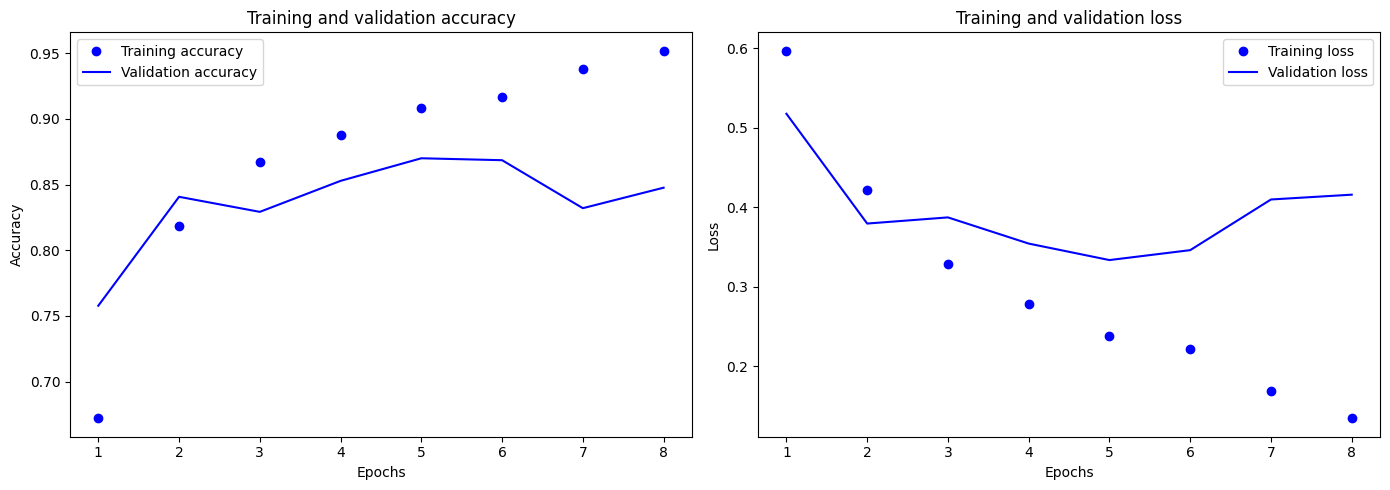

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step
Predictions vs Actual values:
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 0, Actual: 1
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 0, Actual: 1
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 1, Actual: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.8656 - loss: 0.3421
Test Loss: 0.3402612805366516
Test Accuracy: 0.8665599822998047


(0.3402612805366516, 0.8665599822998047)

In [9]:
plot_history(RNU_history)
evaluate_model(RNU_model,input_test,y_test)

### GRU model results

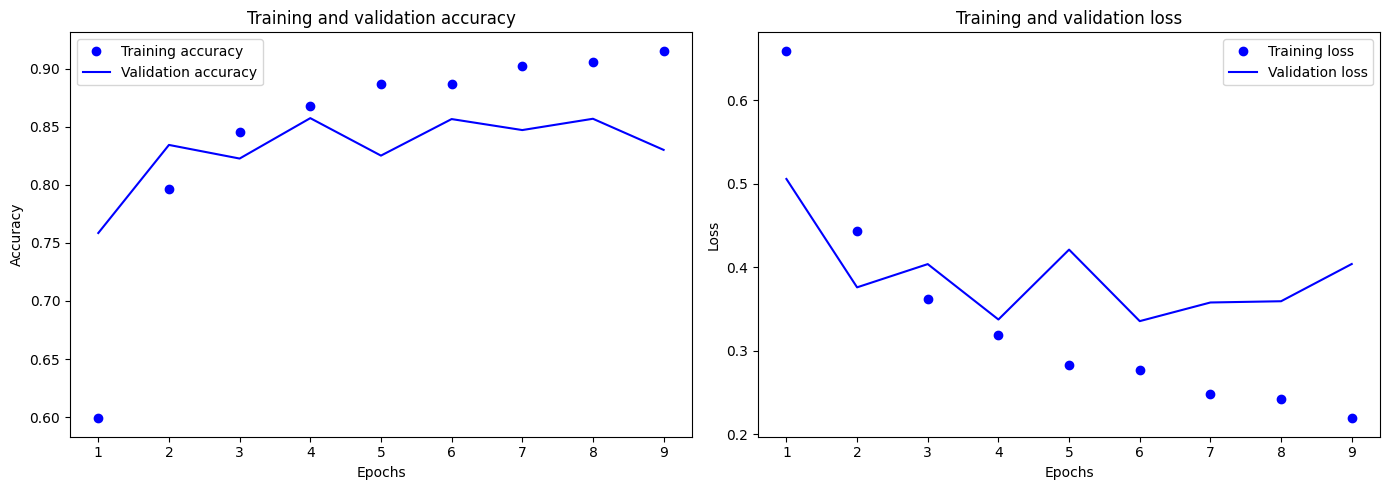

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step
Predictions vs Actual values:
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 1, Actual: 0
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 1, Actual: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.8590 - loss: 0.3364
Test Loss: 0.3327513337135315
Test Accuracy: 0.860480010509491


(0.3327513337135315, 0.860480010509491)

In [10]:
plot_history(GRU_history)
evaluate_model(GRU_model,input_test,y_test)

### LSTM model results

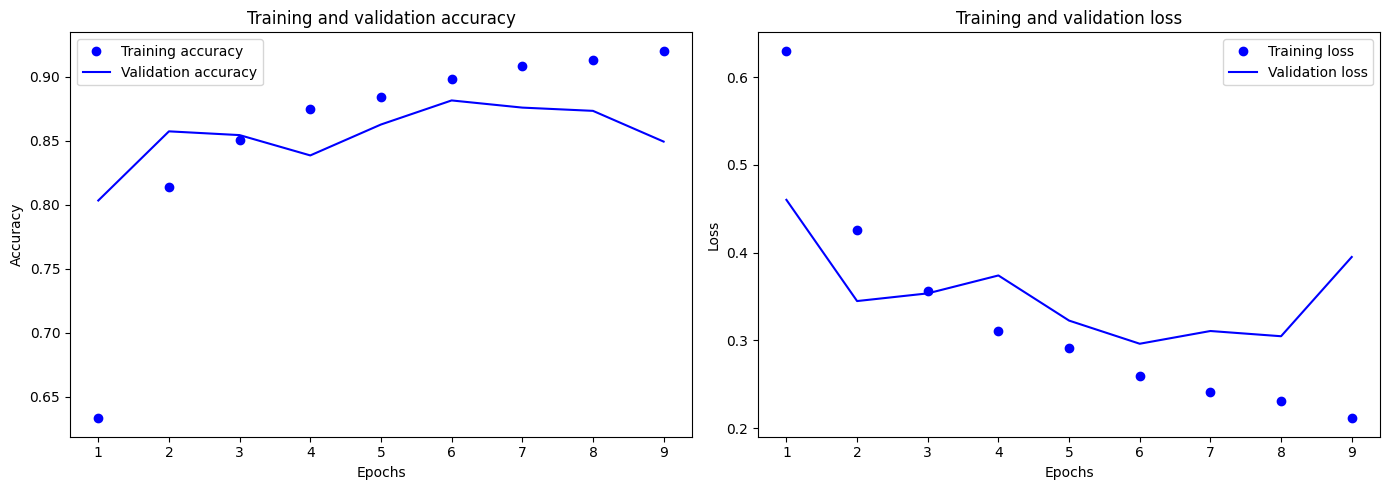

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step
Predictions vs Actual values:
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 1, Actual: 0
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 1, Actual: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - acc: 0.8754 - loss: 0.3111
Test Loss: 0.30609211325645447
Test Accuracy: 0.8781200051307678


(0.30609211325645447, 0.8781200051307678)

In [11]:
plot_history(LSTM_history)
evaluate_model(LSTM_model,input_test,y_test)

### BRNN model results

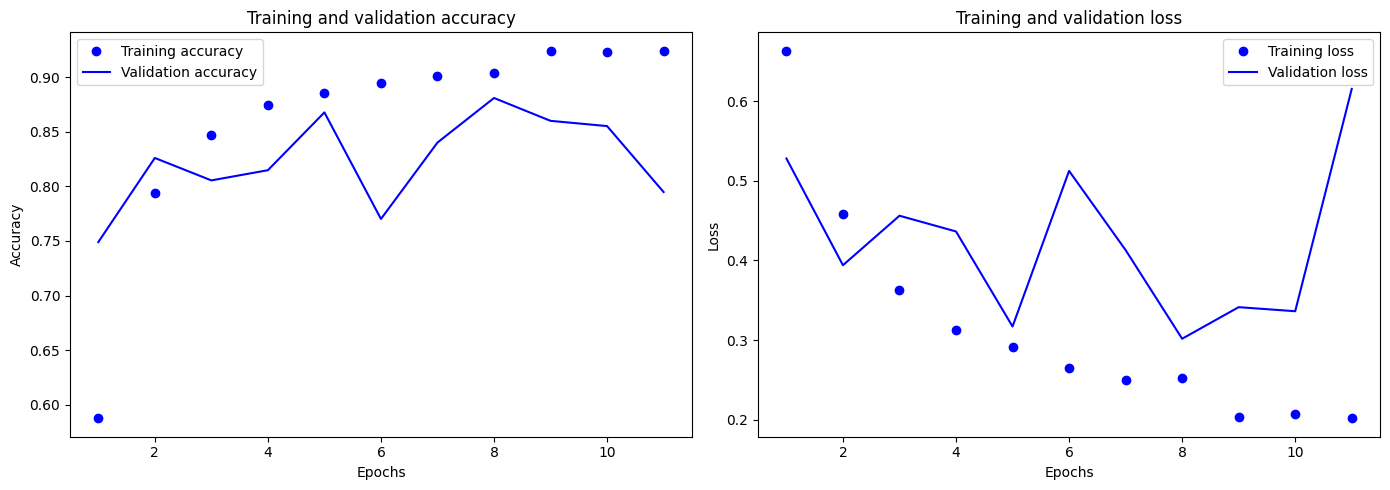

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step
Predictions vs Actual values:
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 1, Actual: 0
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 1, Actual: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.8763 - loss: 0.3176
Test Loss: 0.3126126527786255
Test Accuracy: 0.877560019493103


(0.3126126527786255, 0.877560019493103)

In [12]:
plot_history(BRNN_history)
evaluate_model(BRNN_model,input_test,y_test)

### DRNN model results

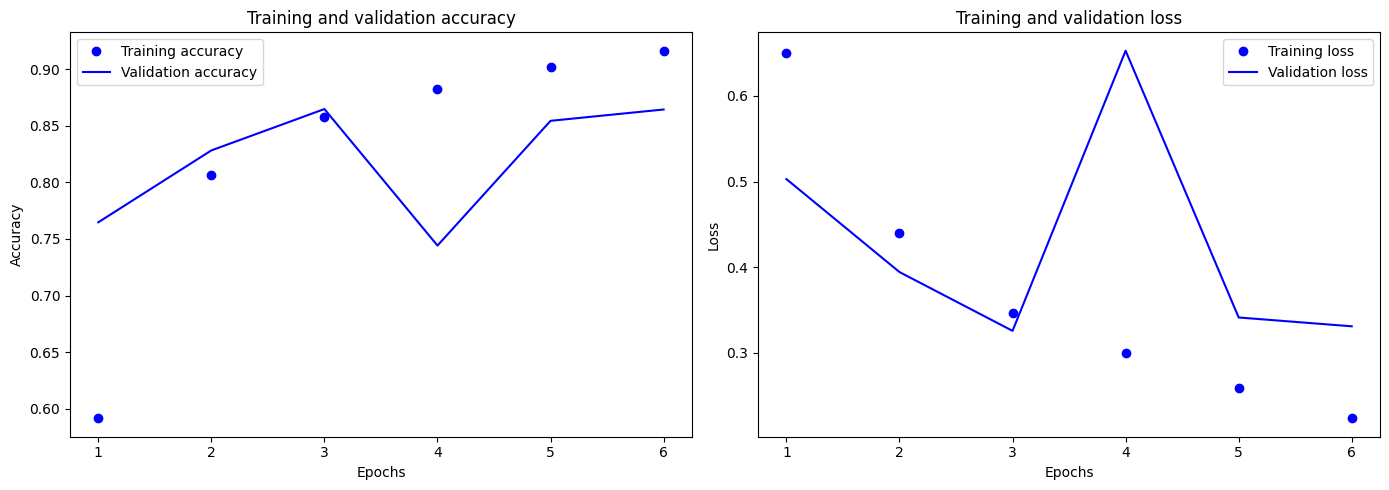

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step
Predictions vs Actual values:
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 1, Actual: 0
Prediction: 1, Actual: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - acc: 0.8648 - loss: 0.3266
Test Loss: 0.3244193196296692
Test Accuracy: 0.8659600019454956


(0.3244193196296692, 0.8659600019454956)

In [13]:
plot_history(DRNN_history)
evaluate_model(DRNN_model,input_test,y_test)

# Summary

| **Model** | **Test Loss** | **Test Accuracy** |
|-----------|---------------|-------------------|
| RNN       | 0.3403        | 0.867             |
| GRU       | 0.3328        | 0.860             |
| LSTM      | 0.3061        | 0.878             |
| BRNN      | 0.3126        | 0.878             |
| DRNN      | 0.3244        | 0.866             |


- **Best Test Accuracy:** LSTM and BRNN (0.878)
- **Best Test Loss:** LSTM (0.3061)

Both LSTM and BRNN models achieved the highest test accuracy, while LSTM had the lowest test loss.